In [5]:
%cd /content/drive/MyDrive/2학년\ 2학기/Deep\ Learning/COSE474-DeepLearning/hw2

/content/drive/MyDrive/2학년 2학기/Deep Learning/COSE474-DeepLearning/hw2


number of classes:  4  sigma for data scatter: 1.0
generating training data
400 data points generated. Seed is random.


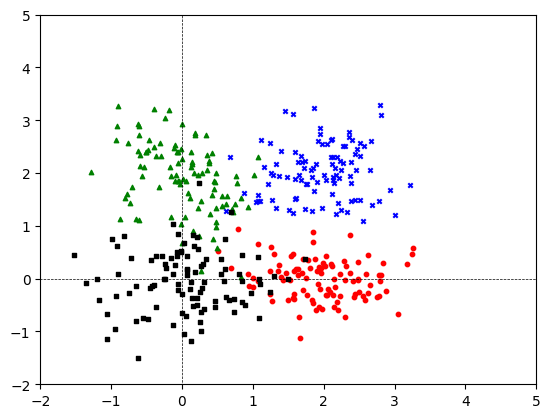

generating test data
100 data points generated. Seed is random.
training softmax classifier...


TypeError: '<' not supported between instances of 'NoneType' and 'float'

In [6]:
'''
HW2 problem
'''

import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy.special as sp
import time
from scipy.optimize import minimize

import data_generator as dg

# you can define/use whatever functions to implememt

########################################
# cross entropy loss
########################################
def cross_entropy_softmax_loss(Wb, x, y, num_class, n, feat_dim):
    # implement your function here
    # return cross entropy loss
    pass

# now lets test the model for linear models, that is, SVM and softmax
def linear_classifier_test(Wb, x, y, num_class):
    n_test = x.shape[0]
    feat_dim = x.shape[1]

    Wb = np.reshape(Wb, (-1, 1))
    b = Wb[-num_class:].squeeze()
    W = np.reshape(Wb[:-num_class], (num_class, feat_dim))
    accuracy = 0

    # W has shape (num_class, feat_dim), b has shape (num_class,)

    # score
    s = x@W.T + b
    # score has shape (n_test, num_class)

    # get argmax over class dim
    res = np.argmax(s, axis = 1)

    # get accuracy
    accuracy = (res == y).astype('uint8').sum()/n_test

    return accuracy


# number of classes: this can be either 3 or 4
num_class = 4

# sigma controls the degree of data scattering. Larger sigma gives larger scatter
# default is 1.0. Accuracy becomes lower with larger sigma
sigma = 1.0

print('number of classes: ',num_class,' sigma for data scatter:',sigma)
if num_class == 4:
    n_train = 400
    n_test = 100
    feat_dim = 2
else:  # then 3
    n_train = 300
    n_test = 60
    feat_dim = 2

# generate train dataset
print('generating training data')
x_train, y_train = dg.generate(number=n_train, seed=None, plot=True, num_class=num_class, sigma=sigma)

# generate test dataset
print('generating test data')
x_test, y_test = dg.generate(number=n_test, seed=None, plot=False, num_class=num_class, sigma=sigma)

# start training softmax classifier
print('training softmax classifier...')
w0 = np.random.normal(0, 1, (2 * num_class + num_class))
result = minimize(cross_entropy_softmax_loss, w0, args=(x_train, y_train, num_class, n_train, feat_dim))

print('testing softmax classifier...')

Wb = result.x
print('accuracy of softmax loss: ', linear_classifier_test(Wb, x_test, y_test, num_class)*100,'%')
